<h2> Load the Dependencies </h2>

In [1]:
from cosipy.response import FullDetectorResponse
from cosipy.spacecraftfile.SpacecraftFile import SpacecraftFile
#from cosipy.ts_map.TSMap import TSMap
from cosipy import BinnedData

from histpy import Histogram, HealpixAxis, Axis
from mhealpy import HealpixMap, HealpixBase
import healpy as hp

from astromodels import *
#from threeML import *

import astropy.units as u
#from astropy.units import Quantity
from astropy.time import Time
from astropy.coordinates import SkyCoord
from scoords import SpacecraftFrame, Attitude

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import copy
import os 

/Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


10:17:38 WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=618734;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=114884;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=815716;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=848090;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=593988;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=308412;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=154862;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=586516;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=307225;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=742352;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=250475;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=331987;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

/Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


10:17:38 INFO      Starting 3ML!                                                                     ]8;id=323346;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=654961;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=585308;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=827986;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=880092;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=248727;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=938290;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=293597;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=926715;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=35012;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=915104;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=396008;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=552579;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=505127;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=328438;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=748230;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=515782;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=968860;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=561800;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=623836;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

10:17:39 WARNING   No fermitools installed                                              ]8;id=323014;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=659483;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

10:17:39 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=615150;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=827310;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=70976;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=137225;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=689634;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=671980;file:///Users/field/opt/miniconda3/envs/cosipy/lib/python3.9/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

<font color='red'> modify the data path to point to location of synced DC2 directory from aws / wasabi</font>

In [2]:
data_path = "/Users/field/COSItools/cosipy/cosipy/test_data/DC2/"

<h2> Define the Extended Source Model (following Thomas' notebook) </h2>

In this section, we define a spatial and spectral model and combine them into an astromodels ExtendedSource object. 

Then, we put the extended source into a HealpixMap, which pixelizes the spatial component. 

In the future, is the goal to have an extension of ExtendedSource that also contains the spectral information in it? 

<h3>Spectral Model:</h3>

In [3]:
spectrum = Gaussian(F = 1e-3, mu = 1809, sigma = 1.8)
#spectrum.display()

<h3>Spatial Model:</h3>

In [4]:
#emission_map_gaussian = Gaussian_on_sphere(lon0 = 0, lat0 = 0, sigma = 10)
emission_map = Disk_on_sphere(lon0 = 90, lat0 = 30, radius = 15)
#emission_map = Asymm_Gaussian_on_sphere(lon0 = 0, lat0 = 0, a=20,e = 0.9994942541,theta=0)# , a = 60)
#emission_map.display()

<h3>Spatio-Spectral Model:</h3>

In [5]:
map_with_spectrum = ExtendedSource('disk_gaussian',
                                   spectral_shape=spectrum,
                                   spatial_shape=emission_map)
#map_with_spectrum.display() # uncomment to display all the model properties...

<h3> Projecting the Spatial Model onto a Healpix map</h3>


In [6]:
nside_model = 2**3 # for the galactic map! Can be different from the spacecraft map! 
# Higher numbers give better resolution / less edge effects but calculations take exponentially longer...

In [7]:
m = HealpixMap(nside = nside_model, scheme = "ring", dtype = float,coordsys='G')
coords = m.pix2skycoord(range(m.npix))
m[:] = map_with_spectrum.spatial_shape(coords.l.deg, coords.b.deg)
m.nside

8

<h3>Plot the Healpix map</h3>

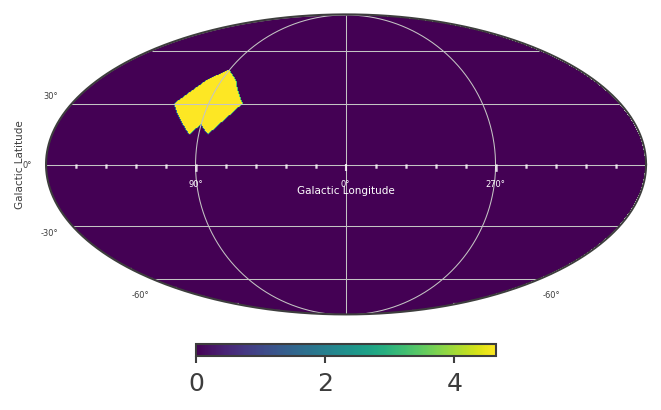

In [8]:
plot, ax = m.plot(ax_kw = {'coord':'G'})

ax.grid();

lon = ax.coords['glon']
lat = ax.coords['glat']
lon.set_axislabel('Galactic Longitude',color='white',fontsize=5)
lat.set_axislabel('Galactic Latitude',fontsize=5)
lon.display_minor_ticks(True)
lat.display_minor_ticks(True)
lon.set_ticks_visible(True)
lon.set_ticklabel_visible(True)
lon.set_ticks(color='white',alpha=0.6)
lat.set_ticks(color='white',alpha=0.6)
lon.set_ticklabel(color='white',fontsize=4)
lat.set_ticklabel(fontsize=4)
lat.set_ticks_visible(True)
lat.set_ticklabel_visible(True)

<h3>Checking out weighting and normalization properties...</h3>

In [9]:
np.sum(m)*4*np.pi/m.npix

1.0638724282445466

This is ~1, meaning that the spatial component is still normalized in the Healpix map. 

The pixel values, i.e. the call to the function Disk_on_sphere(lon,lat), should have units $\mathrm{sr^{-1}}$.

The differential spectrum of each pixel in units of $\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}\,sr^{-1}}$ is then simply given by weighting the spectrum part of the extended source by the corresponding pixel value, so that:

In [10]:
n_e = 200
energies = np.linspace(1800.,1820.,n_e)*u.keV
diff_spectrum = map_with_spectrum.spectrum.main.Gaussian(energies)

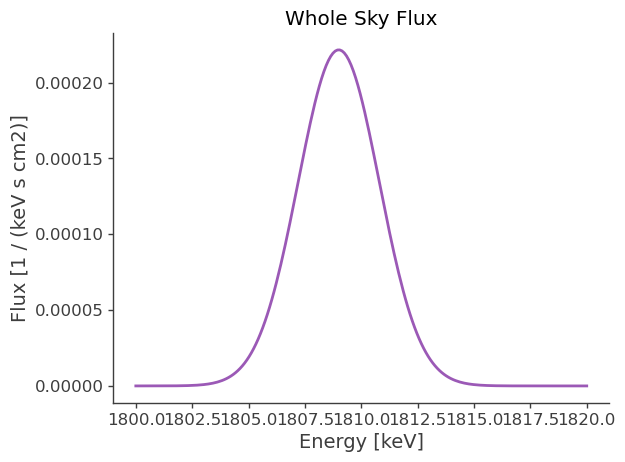

In [11]:
plt.plot(energies,diff_spectrum);
plt.xlabel(f"Energy [{energies.unit}]");
plt.ylabel(f"Flux [{diff_spectrum.unit}]");
plt.title("Whole Sky Flux");

In [12]:
diff_spectrum_90_30 = diff_spectrum*map_with_spectrum.Disk_on_sphere(90,30)/u.sr


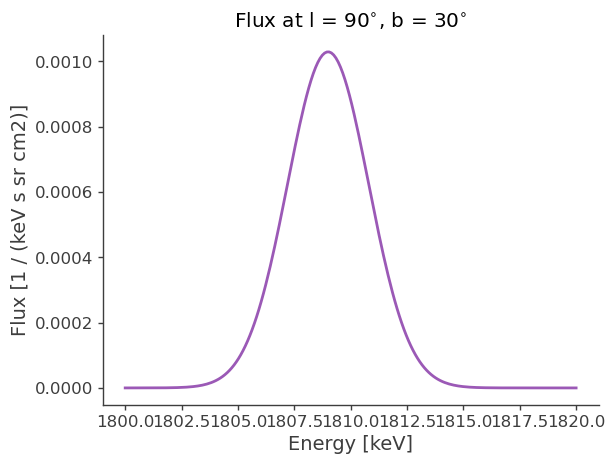

In [13]:
plt.plot(energies,diff_spectrum_90_30);
plt.xlabel(f"Energy [{energies.unit}]");
plt.ylabel(f"Flux [{diff_spectrum_90_30.unit}]");
plt.title(r"Flux at l = 90$^{\circ}$, b = 30$^{\circ}$");

<h2>Use the Model to make a CDS Prediction in Spacecraft Coordiates </h2>

<h3> Load the orientation file </h3>

In [14]:
orientation = SpacecraftFile.parse_from_file(data_path + "Data/Orientation/20280301_3_month.ori")

<h3> Load the full detector response</h3>

In [15]:
%%time
response = FullDetectorResponse.open(data_path + "Responses/SMEXv12.511keV.HEALPixO4.binnedimaging.imagingresponse.nonsparse_nside16.area.h5")

axes_image_response = [ response.axes[name] for name in ["NuLambda", "Ei", "Em", "Phi", "PsiChi"]]
image_response_dense = Histogram(axes_image_response, unit = response.unit)
contents = response._file['DRM']['CONTENTS'][:]
image_response_dense[:] = contents * response.unit

CPU times: user 7.9 s, sys: 3.64 s, total: 11.5 s
Wall time: 14.8 s


<h3> Load the Data or Simulated Data for Comparison </h3>

At this point, all we really need from simulated source data is the dimension, in order to be able calculate an expectation in the same time and space bins.

We need the simulated background data because it is added to the source model to generate an expectation.

<font color='red'>Note: in the future we will want to use a full background model! Right now we are using cosmic photons only, as some of the background simulations are still running.</font>

<font color='red'>Actually, right now i'm not loading backgrounds at all, because it kills my kernel</font>

In [18]:
%%time

data511 = BinnedData(data_path + "Data/Sources/511_3months.yaml")
data511.get_binned_data(unbinned_data=data_path + 'Data/Sources/511_thick_disk_3months.fits.gz',)

# Need to ultimately load a background, but right now this seems to use up all of my memory, so skipping it!
#bkg_data = BinnedData(data_path + "Data/Sources/511_3months.yaml")
#bkg_data.get_binned_data(unbinned_data=data_path + 'Data/Backgrounds/cosmic_photons_3months_unbinned_data.fits.gz',)

binning data...

Note: time bins must be equally spaced between min and max time.
Using time bin size [s]: 60.00011278280288

Time unit: s
Em unit: keV
Phi unit: deg
PsiChi unit: None
CPU times: user 10.2 s, sys: 1.03 s, total: 11.2 s
Wall time: 11.8 s


In [31]:
#make the time axis...
tmin = data511.tmin
tmax = data511.tmax
tstep = data511.time_bins

time_edges_data = [tmin]

if isinstance(tstep, list): time_edges_data = tstep
else: 
    time_edges_data = time_edges_data + [tmin+ tstep*(i+1) for i in range(int((tmax-tmin)/tstep))]
print (len(time_edges_data))

133000


<h3> Create the Coordinate Conversion Matrix (CCM)</h3>

The coordinate conversion matrix is the matrix which is used to convert the image in galactic coordinates into the detector coordinate at each time step. 

It is a three-dimensinal matrix, whose first, second and third axes are a healpix index in the galactic coordinate, a time, a healpix index in the detector coordinate.

It takes a long time to calculate the matrix, so you can either calculate and save it (first cell) or simply load a previously saved matrix (second cell).

<font color='red'>Note: the str(response.filename) is because FullDetectorResponse.open throws an error when given a PosixPath, rather than a string of the response filename </font>

In [ ]:
coordsys_conv_matrix = Histogram.open(f"ccm.hdf5")

<h3> Calculate expected counts in CDS </h3>

In [41]:
%%time

def calc_expected_counts(m, response, event_dense, bkg_dense, bkg_norm = 1.0, almost_zero = 1e-10):

    pixarea = m.pixarea()
    expectation = Histogram(event_dense.axes) # empty hist with same axes as data...
    map_rotated = np.tensordot(coordsys_conv_matrix.contents, m.contents, axes = ([0], [0])) 

    #  ["lb", "Time", "NuLambda"] x  ["lb", "Ei"] => ["Time", "NuLambda", "Ei"]
    map_rotated *= coordsys_conv_matrix.unit * m.unit # data.coordsys_conv_matrix.contents is sparse, so the unit should be restored.

    # expectation based on the model
    expectation[:] = np.tensordot( map_rotated, image_response_dense.contents, axes = ([1,2], [0,1])) * pixarea
    #  ["Time", "NuLambda", "Ei"] x ['NuLambda', 'Ei', 'Em', 'Phi', 'PsiChi'] => ["Time", 'Em', 'Phi', 'PsiChi']

    #expectation += bkg_dense * bkg_norm # expectation based on the background
    # leaving this out for now because i cannot load background
    
    expectation += almost_zero  # small delta to avoid an error when calculating log-likelihood  



expectation = calc_expected_counts(m, response, event_dense, bkg_dense)

AttributeError: 'HealpixMap' object has no attribute 'contents'

In [20]:
coordsys_conv_matrix.contents

Format,coo
Data Type,float64
Shape,"(768, 4, 768)"
nnz,12294
Density,0.00521087646484375
Read-only,True
Size,384.2K
Storage ratio,0.0


In [21]:
print(m.nside)

32
